Base: Titanic
Apresentação: [Google Drive](https://docs.google.com/presentation/d/1TjVHEw3k8lL9P2HtF5-_NX3LJyEiuooRLwaV5ZAo5Uo/edit?usp=sharing)

In [1]:
#Importando bibliotecas

import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [2]:
#Carregando dataset e alterando cabeçalho
dataset = pd.read_csv("https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_lab_sample.csv", header=0, 
                      names = ['classe','sexo','idade','parentes_bordo','pais_bordo','valor_passagem','sobrevivente'])


In [36]:
dataset.head(20)

,classe,sexo,idade,parentes_bordo,pais_bordo,valor_passagem,sobrevivente
0,1,1,29.000000,0,0,211.3375,1
1,1,0,0.916700,1,2,151.5500,1
2,1,1,2.000000,1,2,151.5500,0
3,1,0,30.000000,1,2,151.5500,0
4,1,1,25.000000,1,2,151.5500,0
5,1,0,48.000000,0,0,26.5500,1
6,1,1,63.000000,1,0,77.9583,1
7,1,0,39.000000,0,0,0.0000,0
8,1,1,53.000000,2,0,51.4792,1
9,1,0,71.000000,0,0,49.5042,0


In [38]:
dataset.describe(include='all')

,classe,sexo,idade,parentes_bordo,pais_bordo,valor_passagem,sobrevivente
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,2.215704,0.387184,30.089513,0.518051,0.435018,5135.653576,0.420578
std,0.858270,0.487326,13.801245,0.956431,0.913772,27541.433817,0.493875
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,9.840650,0.000000
50%,2.000000,0.000000,30.089513,0.000000,0.000000,26.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,1.000000,71.837475,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,262375.000000,1.000000


In [5]:
#Quantidade de pessoas por nas classes do Navio
print(dataset.groupby('classe').size())

classe
1    314
2    241
3    553
dtype: int64


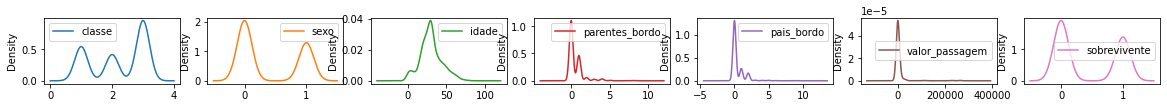

In [7]:
dataset.plot(kind='density', subplots=True, layout=(7,7),sharex=False, sharey=False, figsize=(20,10))
pyplot.show()

# As informações contidas nesses gráficos certificam as informações geradas a partir do describe e groupby. 
# Além disso é possível levantar algumas hipóteses quanto a quantidade de passageiros que viajaram sozinhos, ou apenas com os pais por exemplo.

Treinando os dados



In [113]:
titanic_array = dataset.values
X = titanic_array[:,0:6]
Y = titanic_array[:,6]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=0, shuffle=True)

In [114]:
X_train[0:5]

array([[2.00000000e+00, 0.00000000e+00, 6.20000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.05000000e+01],
       [3.00000000e+00, 1.00000000e+00, 8.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 2.10750000e+04],
       [3.00000000e+00, 0.00000000e+00, 4.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 3.00895126e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.75000000e+00]])

In [115]:
Y_train[0:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

Criando e treinando o modelo

In [116]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
#Prevendo com base nos dados [Entrada: Dados já conhecidos]
model.predict([[1,1,53.0,2,0,51.4792]])

array([1.])

In [118]:
model.predict([[1,0,36.0,0,0,75.2417]])

array([0.])

In [119]:
#Predições para o conjunto de dados
predictions_train = model.predict(X_train)
predictions_validation = model.predict(X_validation)

In [120]:
#Usando os dados utilizados para treinar
print(sklearn.metrics.accuracy_score(Y_train, predictions_train))

0.766546329723225


In [121]:
#Usando os dados NÃO utilizados para treinar
print(sklearn.metrics.accuracy_score(Y_validation, predictions_validation))

0.7292418772563177


In [124]:
#Impressão da base com as predições
df = pd.DataFrame(data=np.c_[X_validation, Y_validation, predictions_validation], columns = ['classe','sexo','idade','parentes_bordo','pais_bordo','valor_passagem','sobrevivente', 'predito'])
df

,classe,sexo,idade,parentes_bordo,pais_bordo,valor_passagem,sobrevivente,predito
0,3.0,1.0,23.000000,0.0,0.0,7.5500,1.0,0.0
1,3.0,0.0,21.000000,0.0,0.0,7925.0000,0.0,0.0
2,3.0,0.0,14.000000,5.0,2.0,46.9000,0.0,0.0
3,2.0,0.0,28.000000,0.0,0.0,13.5000,0.0,0.0
4,2.0,1.0,22.000000,1.0,2.0,41.5792,1.0,1.0
...,...,...,...,...,...,...,...,...
272,2.0,1.0,30.000000,3.0,0.0,21.0000,1.0,1.0
273,3.0,1.0,27.000000,0.0,0.0,7925.0000,1.0,0.0
274,1.0,0.0,24.000000,1.0,0.0,82.2667,1.0,0.0
275,3.0,1.0,30.089513,1.0,1.0,22.3583,1.0,1.0
